In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew


In [5]:
import matplotlib.pyplot as plt

# Correcting the style name to "ggplot"
plt.style.use("ggplot")

# Correcting the attribute name to "rcParams"
plt.rcParams['figure.figsize'] = (12, 8)


In [9]:
data=pd.read_csv("/kaggle/input/carpricedetection/Cardheko.csv")

In [10]:
data.head()

,name,year,sellingprice,kmdriven,fuel,sellertype,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4317 non-null   object
 1   year          4317 non-null   int64 
 2   sellingprice  4317 non-null   int64 
 3   kmdriven      4317 non-null   int64 
 4   fuel          4317 non-null   int64 
 5   sellertype    4317 non-null   int64 
 6   transmission  4317 non-null   int64 
 7   owner         4317 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 269.9+ KB


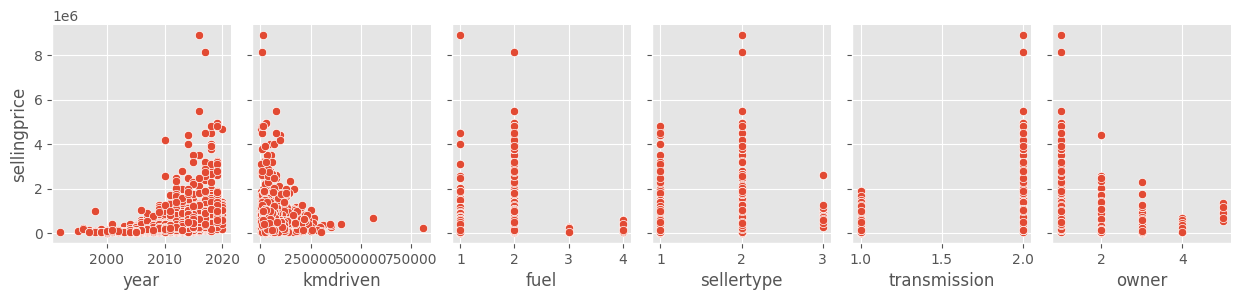

In [14]:
sns.pairplot(data,x_vars=['year','kmdriven','fuel','sellertype','transmission','owner'],y_vars='sellingprice',height=3,aspect=0.7)

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:

df = pd.DataFrame(data)

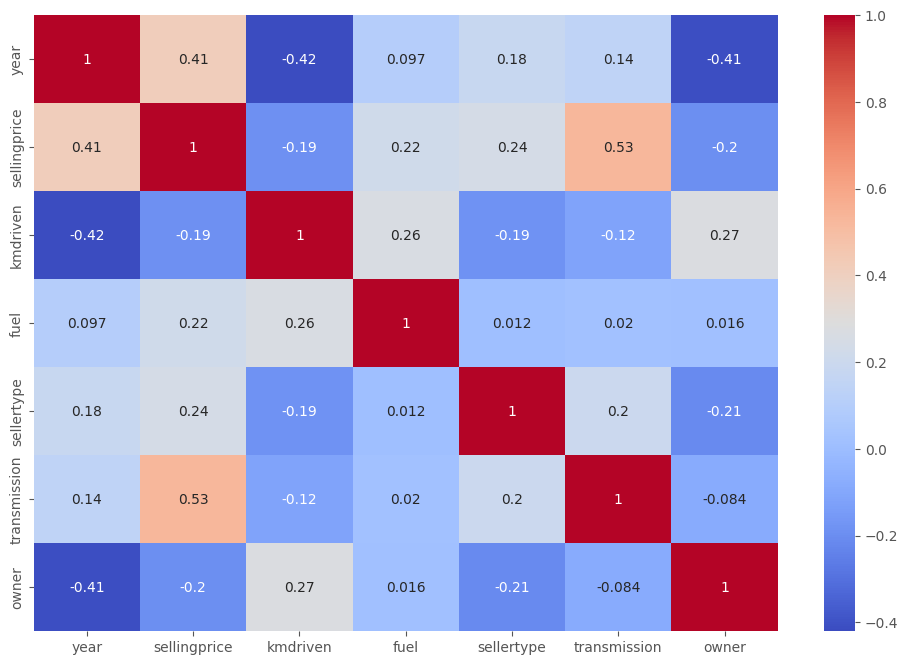

In [20]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
dropdata=data.drop(['name','fuel','sellertype','transmission'],axis='columns')
dropdata

,year,sellingprice,kmdriven,owner
0,2007,60000,70000,1
1,2007,135000,50000,1
2,2012,600000,100000,1
3,2017,250000,46000,1
4,2014,450000,141000,2
...,...,...,...,...
4312,2019,2800000,10000,1
4313,2015,470000,170000,1
4314,2017,415000,20000,1
4315,2014,500000,82000,1


In [26]:
pred = model.predict([[2010, 100000, 2]])
print(pred)

[316525.75913216]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
#liner Regression
from sklearn.linear_model import LinearRegression
x=data[['year','kmdriven','owner']]
y=data.sellingprice
model= LinearRegression()
model.fit(x,y)

print("intercept=",model.intercept_)
print("coefficient",model.coef_)
list(zip(['year','kmdriven','owner'],model.coef_))

intercept= -108181907.38915981
coefficient [ 5.40156246e+04 -2.30677506e-01 -2.49523002e+04]


[('year', 54015.62462647711),
 ('kmdriven', -0.2306775062022649),
 ('owner', -24952.30015338877)]

In [25]:
pred = model.predict([[2010, 100000, 2]])
print(pred)

[316525.75913216]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
